# 서울시 유동인구수 분석 및 시각화
- 주제: 서울시 유동인구수 분석 및 시각화
- 팀원: 강종훈, 장종환, 김세헌, 황원정

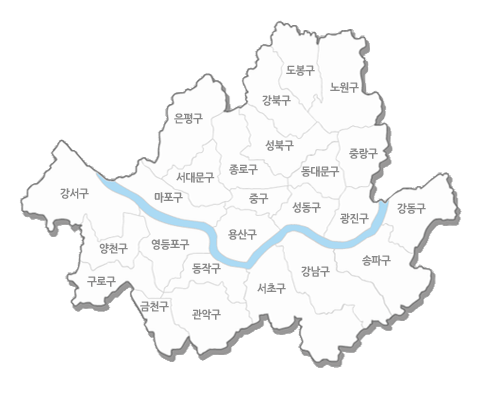

 SK Data Hub에서 가져온 20년 1월 부터 10월까지의 서울시 유동인구 데이터 분석해보았습니다. '월별, 시간별, 나이대별, 지역별, 성별'에 따른 유동인구수 변화와 각 주제의 연관성 유무를 알아보고, 더 나아가 코로나(covid-19)와 유동인구수와의 연관성을 찾아보고 실제로 코로나가 유동인구수에 어떤 영향을 끼쳤는지 알아보고자 했습니다. 서울시 코로나 확진자 수에 따른 유동인구수 변화를 알아보았습니다. (기지국의 로그정보를 기반으로 유동인구를 파악한 것이기 때문에 전체 유동인구 자료가 아님을 고려하고 분석해 보았습니다.)

 궁극적 목표는 더 많은 데이터를 더 다양한 시각으로 바라보고 분석하여 교통 측면에서 새로운 인사이트를 찾는 것입니다. 서울시 버스 노선과 유동인구를 연관지어 비교 후 버스 노선 개선 및 추가가 필요한 대상 후보 지역을 선정하는 것을 최종 프로젝트 주제로 생각 중입니다. 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import cx_Oracle
import os
import folium

plt.rc('font',family='Malgun Gothic')
plt.rc('axes',unicode_minus=False)

In [2]:
os.putenv('NLS_LANG', '.UTF8')
connection = cx_Oracle.connect('hwj','1234','localhost:1521/orcl')

cursor = connection.cursor()
cursor.execute("""SELECT * FROM allpopu""")

cursor2 = connection.cursor()
cursor2.execute("""SELECT * FROM covid1""")

<cx_Oracle.Cursor on <cx_Oracle.Connection to hwj@localhost:1521/orcl>>

In [3]:
df = pd.read_sql("""select * from allpopu""", con = connection)

# 지역별 유동인구
## 지역별 유동인구수 분석

In [4]:
# 지역별 유동인구수 pivottable로 

df_sum구별유동인구 = df.pivot_table(index='군구',values='유동인구수',aggfunc='mean')
df_sum구별유동인구=df_sum구별유동인구.sort_values(by='유동인구수',ascending=False)
df_sum구별유동인구

,유동인구수
군구,
강남구,48811.874914
송파구,42993.752802
강서구,36667.409885
서초구,34012.209185
노원구,32915.422213
관악구,32663.192672
영등포구,32599.578359
구로구,29392.387814
마포구,28257.840332


지역별 유동인구수를 알아보았습니다.

위에서 구한 지역별 유동인구수를 시각화 했습니다. 

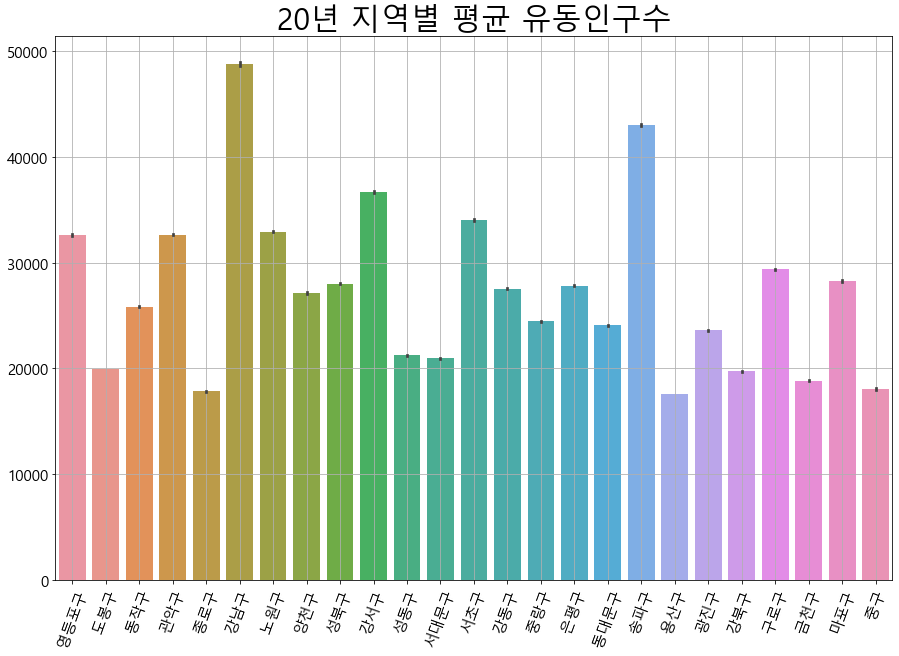

In [5]:
# 지역별 평균 유동인구수 bar그래프

plt.figure(figsize=(15,10))
sns.barplot(data=df, x='군구',y='유동인구수',)
plt.title('20년 지역별 평균 유동인구수',size=30)
plt.xlabel('')
plt.ylabel('')
plt.xticks(rotation = 70,size=15)
plt.yticks(size=15)
plt.grid(True)

- (20년 1월~10월) 일 평균 유동인구수가 가장 많은 지역은 1위가 강남구, 2위가 송파구, 3위가 강서구입니다.
- 반대로 유동인구가 상대적으로 적은 지역은 강북지역과 중부지역에 집중되어있습니다. 가장 적은 곳은 의외로 용산구였으며 종로구, 중구, 강북구,도봉구 순으로 유동인구가 적었습니다. (이는 각 지역의 인구수와도 연관이 있는 것 같습니다.)
- 강남 3구(강남,서초,송파)는 업무,상업시설이 밀집해 있는 복합지역이라 직장인,쇼핑객들이 강남 등지로 몰리다 보니 다른 지역은 자연스레 인구가 줄고 유동인구 격차가 벌어집니다.
- 반대로 유동인구수가 적은 지역은 주로 주거 기능을 담당하는 구인것으로 보입니다.

용산구에는 사람들이 많이 가는 이태원이 있어서 유동인구수가 많지 않을까 생각했는데 아니었습니다. '그 이유가 거주인구가 적어서 그런 것이 아닐까?'라는 의문점이 생겨서 서울시 구별 인구수데이터와 유동인구수를 비교해 보았습니다.

In [6]:
df_서울구별인구 = pd.read_sql("""SELECT * FROM seoulpopulation""",con=connection)
# df_서울구별인구.drop(index=0,columns='기간',inplace=True)
df_서울구별인구 = df_서울구별인구.sort_values(by='계',ascending=False)
df_서울구별인구 = df_서울구별인구.reset_index(drop=True)
df_서울구별인구

,자치구,세대,계,남자,여자,세대당인구,고령자_65세이상
0,송파구,281417,676673,326602,350071,2.38,92149
1,강서구,266366,589536,284747,304789,2.19,88052
2,강남구,234021,544085,260358,283727,2.30,73942
3,노원구,218002,529532,255618,273914,2.41,84612
4,관악구,275248,514555,257638,256917,1.81,78206
5,은평구,213039,485842,233104,252738,2.26,84353
6,강동구,194602,462275,227346,234929,2.35,68798
7,양천구,180309,460048,225596,234452,2.53,64804
8,성북구,195379,449871,216155,233716,2.25,73370
9,구로구,179792,435751,217380,218371,2.26,69312


지역별 거주인구수를 알아보았습니다

위에서 구한 지역별 거주인구수를 시각화 했습니다.

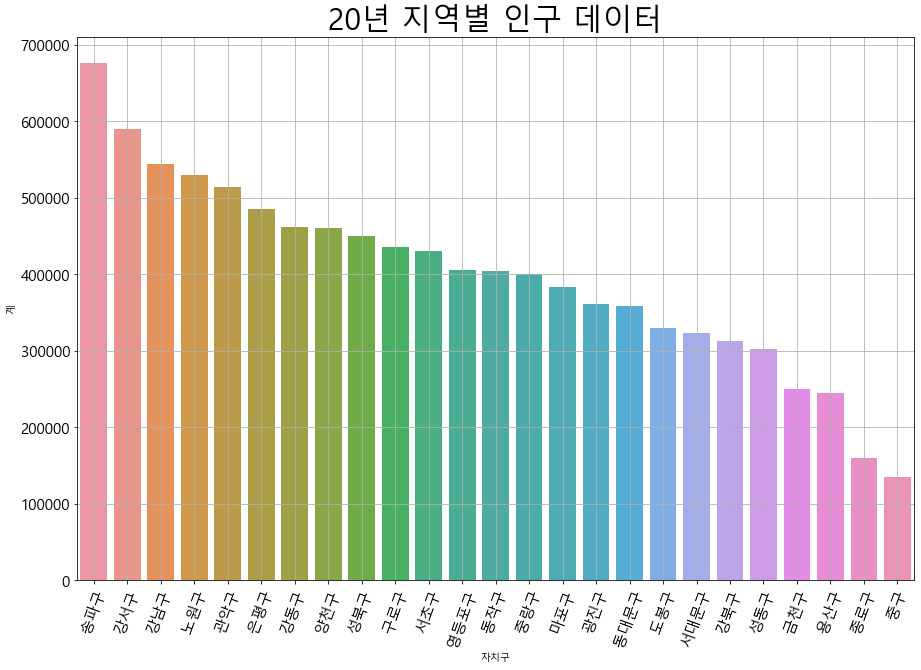

In [7]:
plt.figure(figsize=(15,10))
plt.title('20년 지역별 인구 데이터',size=30)
sns.barplot(data=df_서울구별인구,x='자치구',y='계')
plt.xticks(rotation = 70,size=15)
plt.yticks(size=15)
plt.grid(True)

- 거주인구가 가장 많은 지역은 1위가 송파구 2위 강서구 3위 강남구 였습니다. 이 세 지역 모두 유동인구가 가장 많은 지역 top3에 들었던 지역입니다.
- 반대로 거주인구가 적은 지역은 중구, 종로구, 용산구입니다. 이 세 지역은 마찬가지로 유동인구가 적은 지역 top3에 들었던 지역입니다.
- 이를 통해서 유동인구는 거주인구와 매우 밀접한 관련이 있다는 것을 알 수 있었고, 거주인구 대비 유동인구수를 구하는 것이 좀 더 정확하게 유동인구를 분석할 수 있겠다는 생각이 들었습니다.

## 지역별 유동인구수 Folium 시각화
지도로 좀 더 한 눈에 보기 쉽게 시각화했습니다

In [8]:
geo_json = 'https://raw.githubusercontent.com/southkorea/seoul-maps/master/kostat/2013/json/seoul_municipalities_geo_simple.json'
map1 = folium.Map(location = [37.5642135,127.0016985],zoom_start=11)

folium.Choropleth(
    geo_data=geo_json,
    name = 'choropleth',
    data = df_sum구별유동인구,
    columns = [df_sum구별유동인구.index,'유동인구수'],
    key_on = 'feature.properties.name',
    fill_color = 'PuRd',
    fill_opacity = 0.85,
    line_opacity = 0.2
).add_to(map1)

map1

## 지역별 성별에 따른 유동인구수


성별로는 지역구에 따라 어떤 차이가 있을지 궁금해서 분석해보았습니다.  
의외로 대부분의 구에서 남성보다 여성의 유동인구 비율이 높았습니다. (남성의 유동인구가 많을 것이라 예상했는데, 반대여서 좀 신기했습니다)
    
   - '노원구', '은평구', '송파구'는 여성 유동인구수의 비율이 높았고, '영등포구', '중구', '금천구'는 남성 유동인구수의 비율이 높았습니다.
       - 주로 주거기능을 담당하는 지역이 여성의 비율이 높았습니다. 이는 업무지역으로 출퇴근 하지 않고, 행동반경이 대부분 집 근처인 전업주부들의 영향으로 보입니다.
       - 반대로 남성의 비율이 높은 지역구는 상대적으로 회사와 업무시설이 많은 구였습니다.

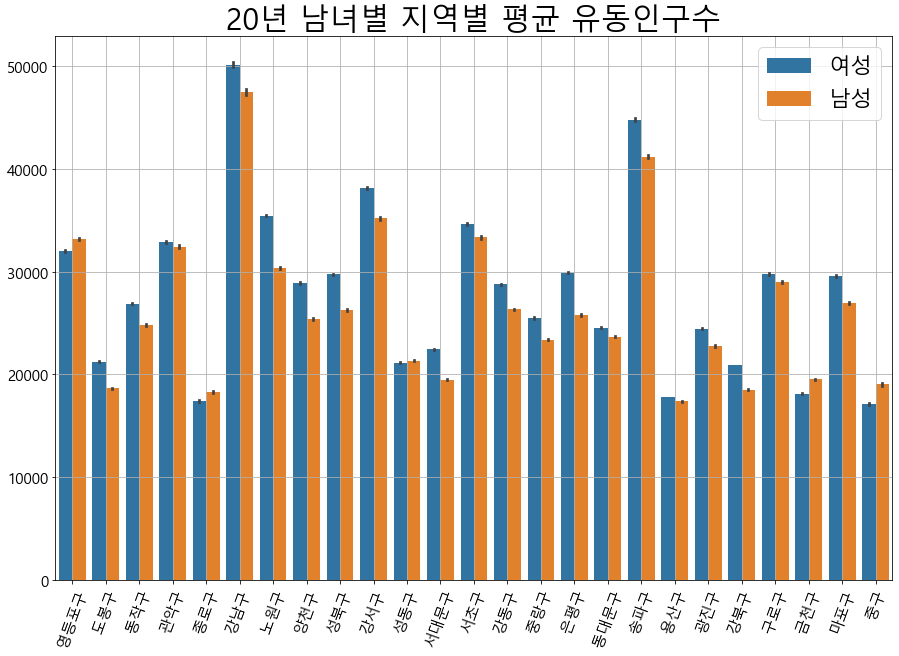

In [9]:
plt.figure(figsize=(15,10))
sns.barplot(data=df, x='군구',y='유동인구수',hue='성별')
plt.title('20년 남녀별 지역별 평균 유동인구수',size=30)
plt.xlabel('')
plt.ylabel('')
plt.xticks(rotation = 70,size=15)
plt.yticks(size=15)
plt.grid(True)
plt.legend(fontsize=22)

No handles with labels found to put in legend.


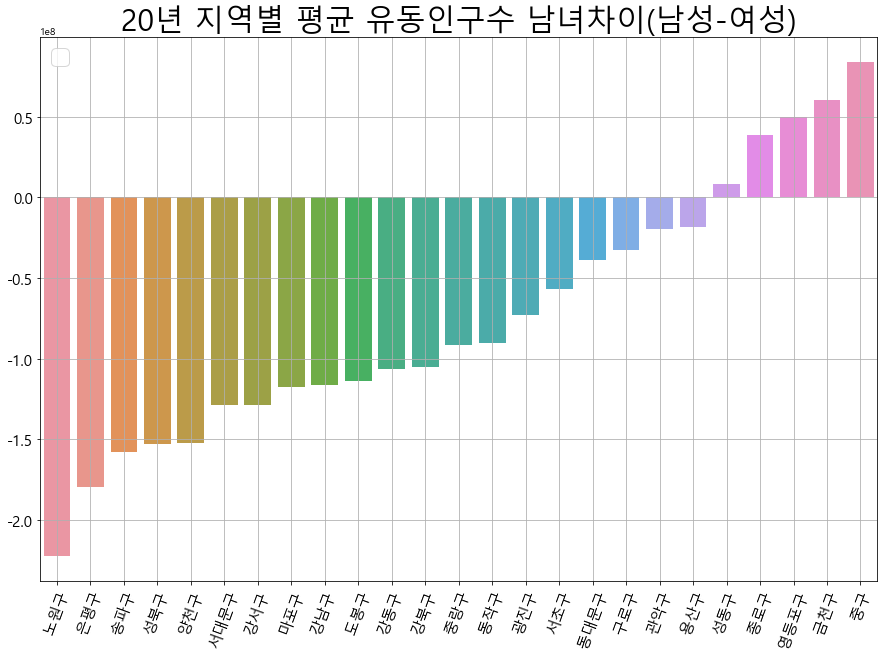

In [10]:
df_sex구별유동인구 = df.pivot_table(index=['성별','군구'],values='유동인구수',aggfunc='sum')
df_sexdif = df_sex구별유동인구.xs('남성') - df_sex구별유동인구.xs('여성')
df_sexdif = df_sexdif.sort_values(by='유동인구수')

plt.figure(figsize=(15,10))
sns.barplot(x=df_sexdif.index,y=df_sexdif['유동인구수'])
plt.title('20년 지역별 평균 유동인구수 남녀차이(남성-여성)',size=30)
plt.xlabel('')
plt.ylabel('')
plt.xticks(rotation = 70,size=15)
plt.yticks(size=15)
plt.grid(True)
plt.legend(fontsize=22)

# 시간대별 유동인구

## 시간대별 유동인구수 분석

In [11]:
timepopu_df = df.pivot_table(index='시간',values='유동인구수',aggfunc='sum')
timepopu_df = timepopu_df.sort_values(by='유동인구수',ascending=False)
timepopu_df

,유동인구수
시간,
16,2536678860
15,2534823230
14,2532166610
13,2528585950
17,2528136520
10,2525425870
9,2518582050
12,2516393890
11,2515997640


몇 시에 유동인구수가 가장 많은지 알아보았습니다.

In [12]:
popu_df = df[['시간', '군구', '유동인구수']]
popu_df_sorted = popu_df.sort_values(by='시간')
popu_pv = popu_df_sorted.pivot_table(index=['시간', '군구'], values='유동인구수', aggfunc='sum')
popu_pv

유동인구수
시간 군구            
0  강남구  138518810
   강동구  107528940
   강북구   79013400
   강서구  139063910
   관악구  131905470
...           ...
23 용산구   58766690
   은평구  112760390
   종로구   44765660
   중구    39602400
   중랑구   97427840

[600 rows x 1 columns]

각 시간대별로 어느 지역에 사람이 가장 많이 몰리는지 알아보았습니다. 

In [13]:
# i 시간에 유동인구수가 가장 많은 지역 top5

for i in range(0,24):
    globals()['a_'+str(i)] = popu_pv.xs(i).sort_values(by='유동인구수',ascending=False).head()

In [14]:
# 예시) 16시에 유동인구수가 많은 지역 top5
popu_pv.xs(16).sort_values(by='유동인구수',ascending=False).head()

,유동인구수
군구,
강남구,220989620
송파구,157076460
서초구,145552360
영등포구,133414190
강서구,128389470


위의 표를 가지고 각 시간대별 유동인구수 top5 지역을 뽑았습니다. 

- 각 시간대별 유동인구수 top5 지역을 나타낸 아래의 차트를 보면, 모든 차트에서 '강남구', '강서구', '송파구'가 빠지지 않고 등장합니다. 세 곳은 서울시에서 인구수가 가장 많은 지역이기도 합니다. 

<!-- ((경제 중심)'강남구'/ (김포공항, 마곡 단지, 화곡동, 등촌동, 염창동 등의 행정동이 있는)'강서구'/ 

(서울에서 인구수가 가장 많은)'송파구')
  -->
- 또한, 회사가 몰려있는 서초구와 영등포구는 근무시간인 7시부터 19시까지 유동인구수가 확 늘었다가 줄어든다는 것을 알 수 있습니다. 그 외의 시간에는 주거지역인 '노원구', '관악구'가 top5를 지키고 있습니다.

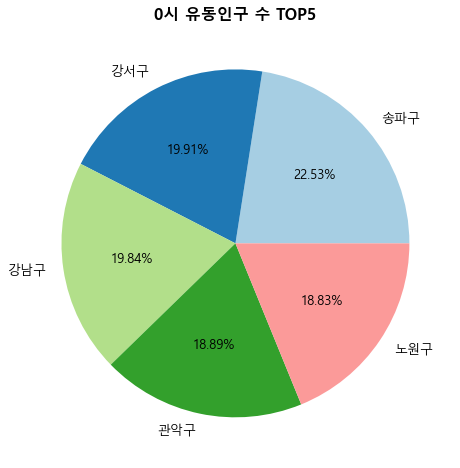

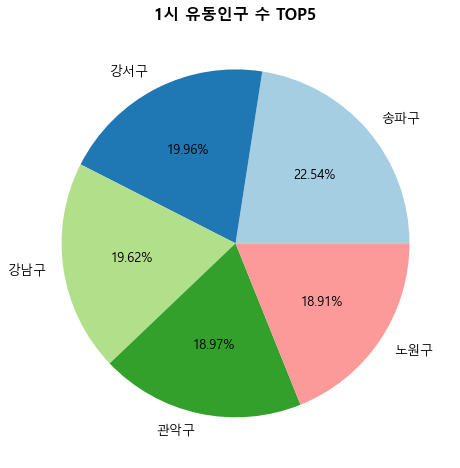

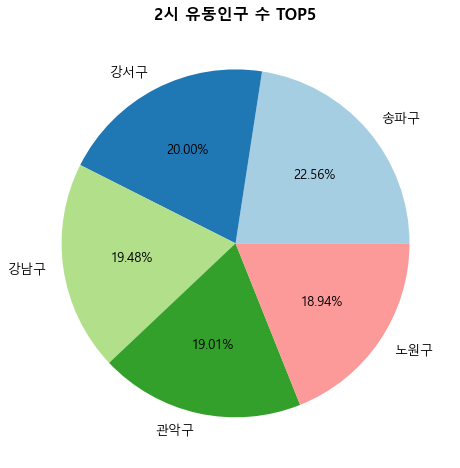

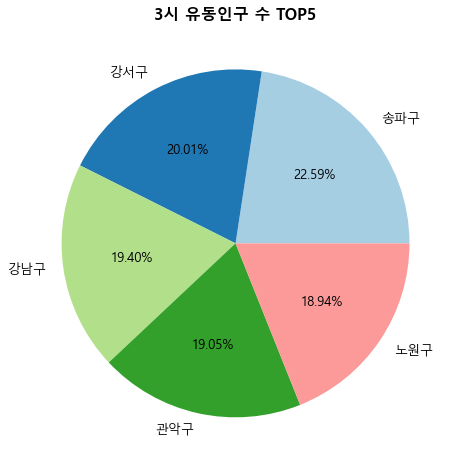

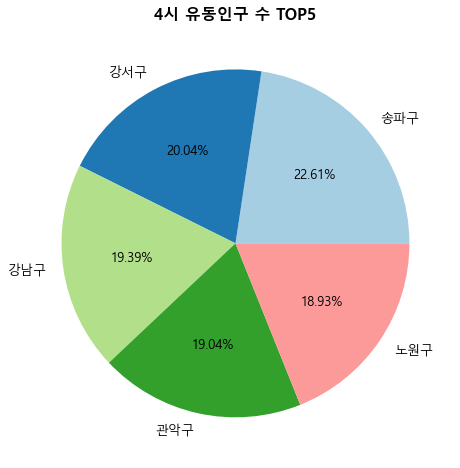

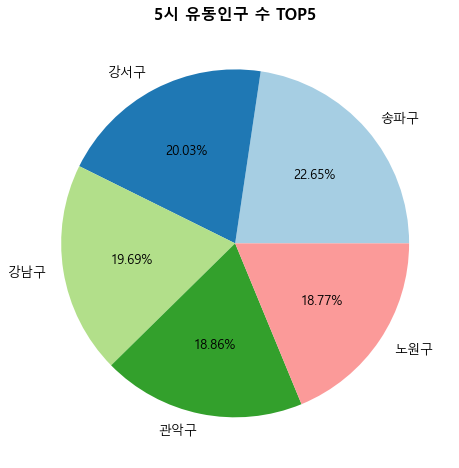

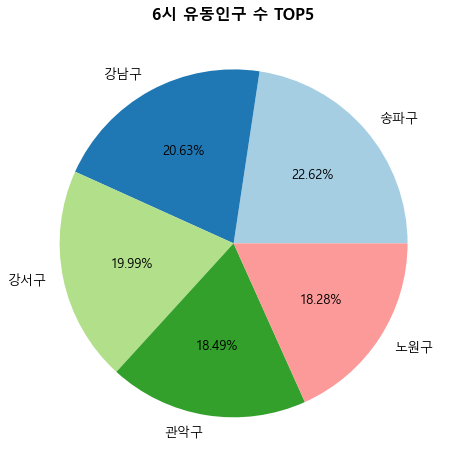

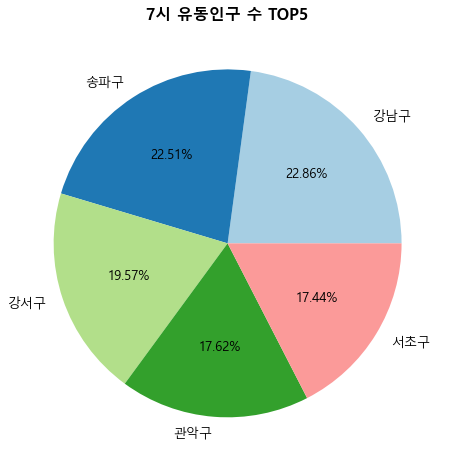

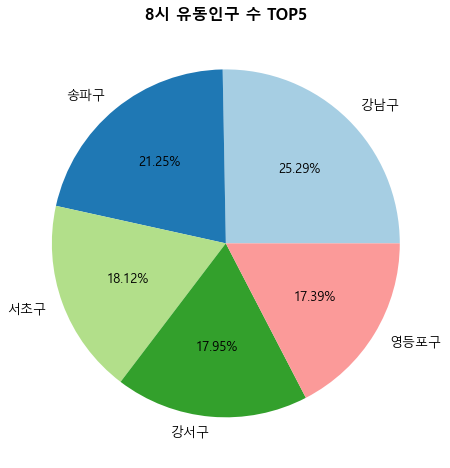

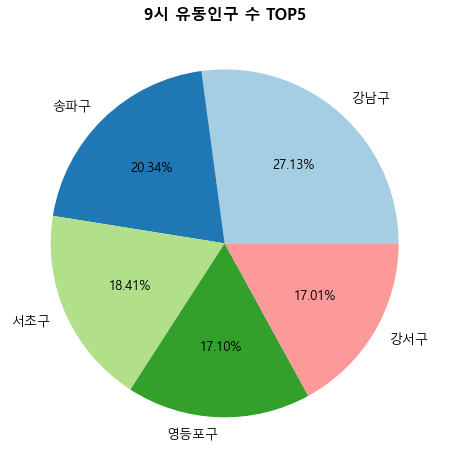

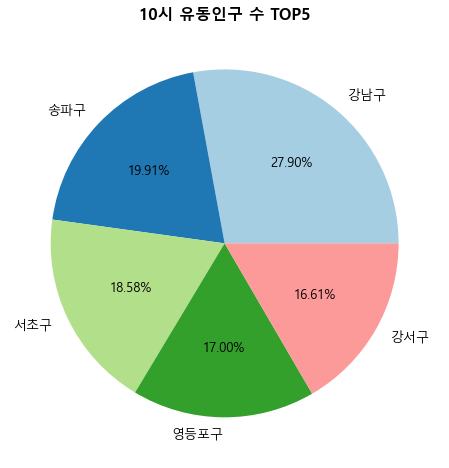

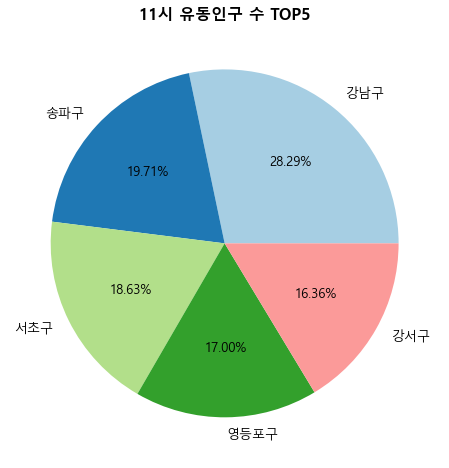

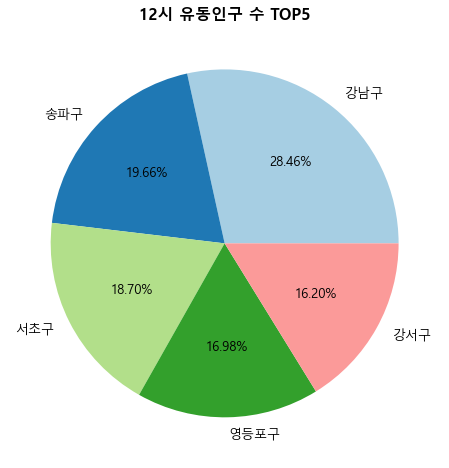

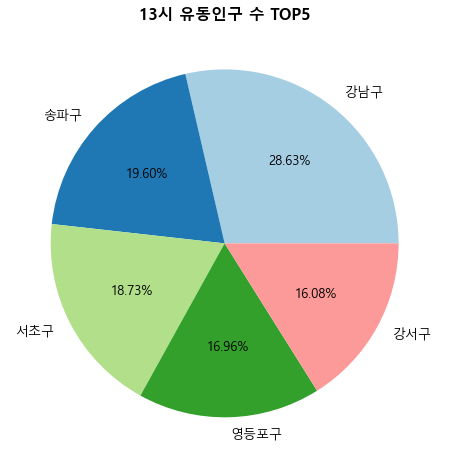

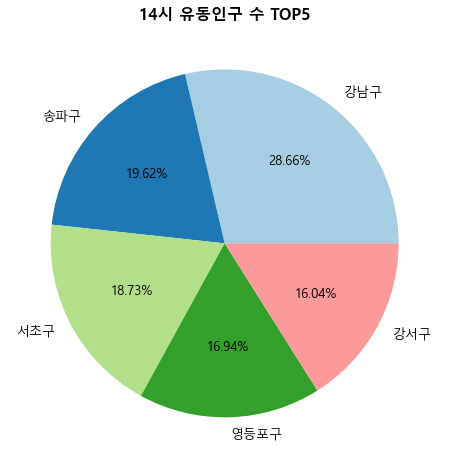

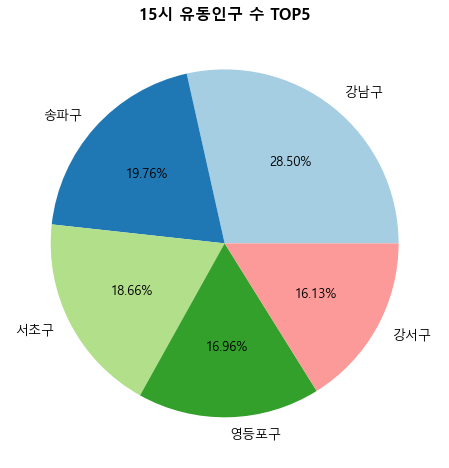

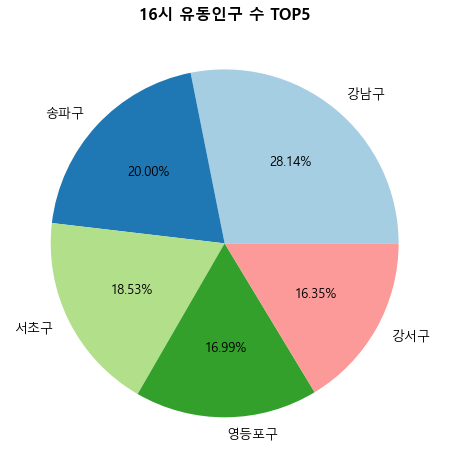

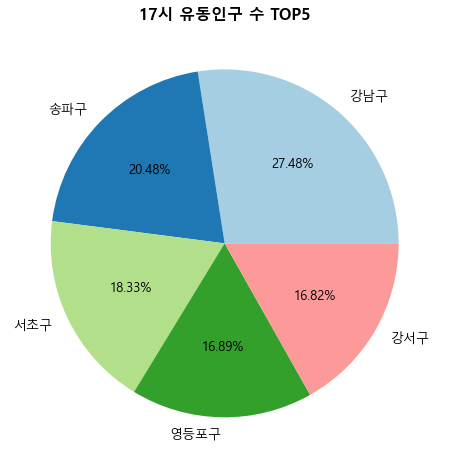

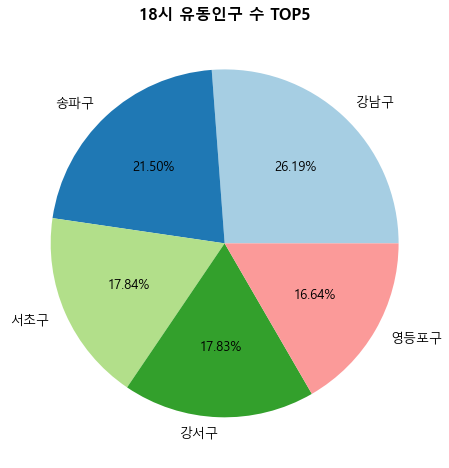

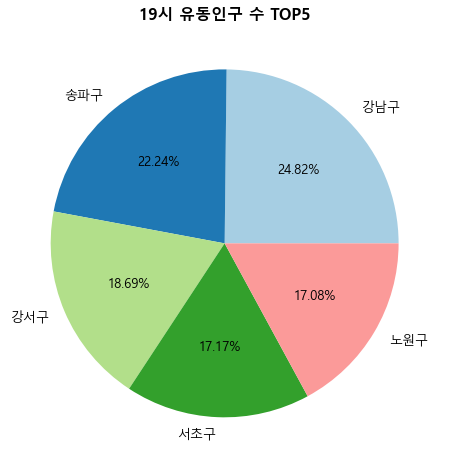

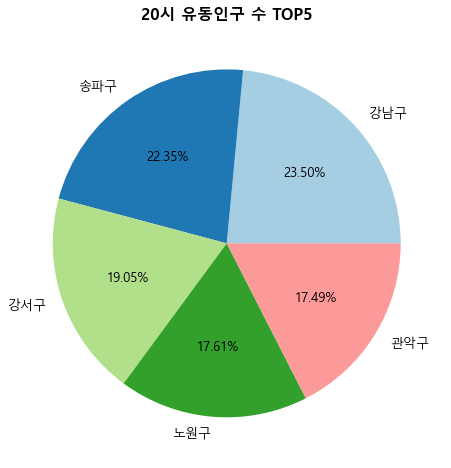

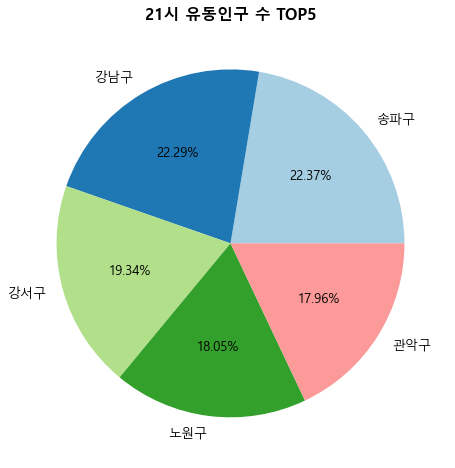

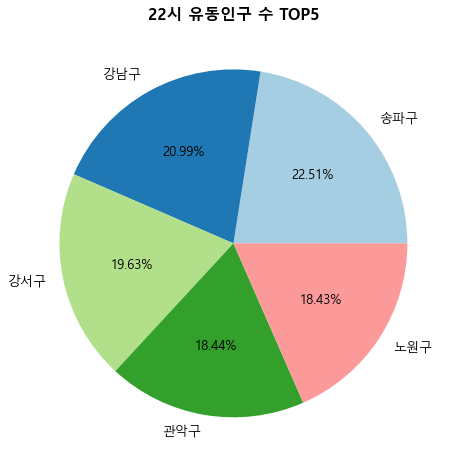

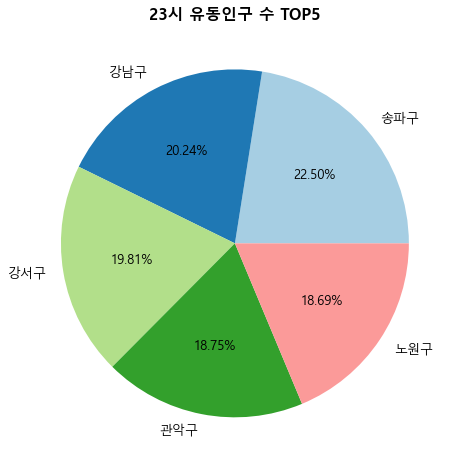

In [15]:
for i in range(0, 24):
    fig = plt.figure(figsize=(8,8))
    colors = sns.color_palette('Paired', 5)
    g = globals()['a_'+ str(i)]
    plt.pie(g['유동인구수'], labels=g.index, autopct='%0.2f%%', colors = colors, radius = 1.0, textprops = {'fontsize':13})
    plt.title(str(i) + '시 유동인구 수 TOP5', fontdict={'fontsize': 16, 'fontweight': 'bold'})
    plt.show()

## 지역의 시간대별 유동인구수 변화
각 지역의 시간대별 유동인구수 변화를 나타낸 그래프 입니다. 

시간대별 유동인구수 top5 지역을 나타낸 위의 차트와 달리, 아래의 그래프는 각 지역의 시간대별 유동인구 수 변화를 한 눈에 볼 수 있습니다.

- 위로 볼록한 그래프는 낮~오후 시간대에 사람이 몰리는 것으로 회사나 상업시설이 몰려있는 지역이라는 것을 알 수 있고, 아래로 볼록한 그래프는 업무 시간을 제외한 저녁 시간대에 사람이 몰리는 것으로 주거지역이라는 것을 알 수 있습니다.
- 그래프의 시작 위치가 다른 지역에 비해 높은 지역을 보면 서울시에서 거주인구수가 많은 지역들과 같습니다. 이를 통해서도 유동인구수와 거주인구수가 연관성이 있다는 것을 알 수 있습니다.

    (거주인구수 많은 곳: '송파구', '강서구', '강남구', '노원구', '관악구', '은평구', '강동구', '양천구', '성북구', '서초구') 
- '중구', '강남구', '종로구', '서초구' 그래프를 보면 다른 지역에 비해 볼록한 것을 알 수 있는데, 이 네 지역은 모두 업무지역으로 특정 시간에만 집중적으로 사람이 몰리기 때문입니다.

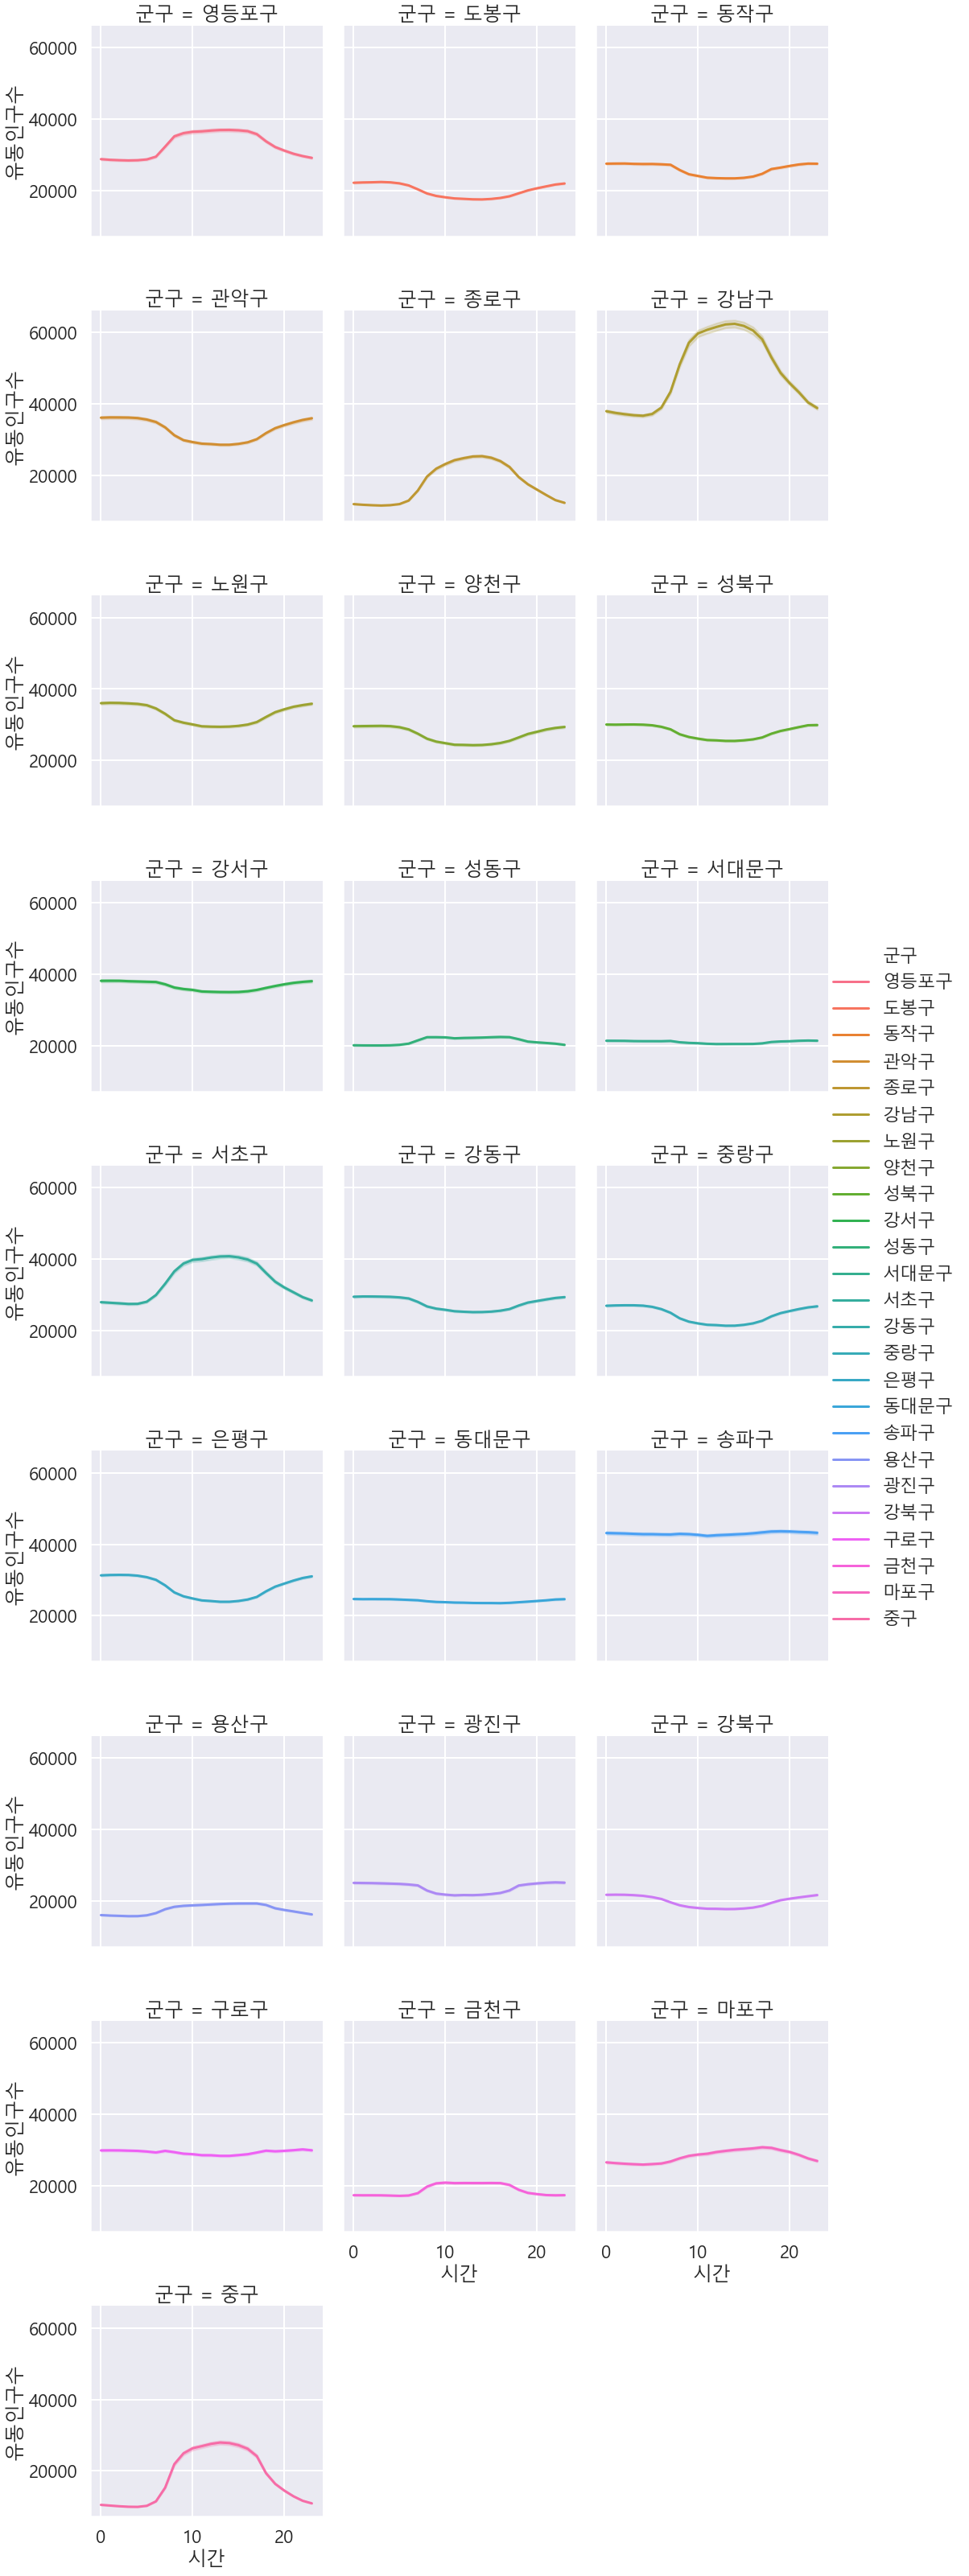

In [16]:
# 지역에 따른 시간대별 유동인구변화
sns.set_style("darkgrid")
sns.set_context("poster")
plt.rc('font', family='Malgun Gothic')
# plt.rc('axes',labelsize='large')
sns.relplot(data=popu_df,x='시간',y='유동인구수',hue='군구',kind='line',col='군구',col_wrap=3)

# 월별 유동인구
## 코로나와 유동인구수

In [17]:
# for 문을 돌려 1월부터 9월까지의 Data를 가져온다, 10월은 자리수가 달라서 따로 코드를 작성함.
for i in range(1,10):
    globals()["df_"+str(i)] = pd.read_sql("""SELECT * FROM allpopu WHERE 일자 LIKE '20200{}%'""".format(i), con=connection)

df_10 = pd.read_sql("""SELECT * FROM allpopu WHERE 일자 LIKE '202010%'""",con=connection)
# 일자별 유동인구가 코로나와 연관이 있을까 하여 서울시 코로나 csv 파일 다운 후 로드하였다.
covid_df = pd.read_sql("""SELECT * FROM covid1""",con=connection)
# 내가 필요한 정보의 column만 남김.
covid_df = covid_df[["확진일", "지역"]]
a = covid_df["확진일"]
covid_df["월"] =  a.str.split(".").str[0]

In [18]:
# 월별 유동인구의 총합을 List로 받아왔다.

x = ['1월','2월','3월','4월','5월','6월','7월','8월','9월','10월']
y = []

for i in range(1,11):
    g = globals()["df_" + str(i)]
    y.append(g["유동인구수"].sum())

p_df = pd.DataFrame()
p_df["월"] = x
p_df["유동인구"] = y
p_df

,월,유동인구
0,1월,6129607780
1,2월,5905927290
2,3월,5836389110
3,4월,5889837540
4,5월,5991010170
5,6월,5899059940
6,7월,6087622000
7,8월,5970941690
8,9월,5816724160
9,10월,6026575310


월별 유동인구수를 구해보았습니다.

In [19]:
# month= 서울시 지역별 코로나 확진자 수
month = covid_df["월"].value_counts().index.tolist()
month = list(map(int,month))

# conf= 월(1월 ~ 10월) 
conf = covid_df["월"].value_counts().tolist()

# DF화 작업
covid_df2 = pd.DataFrame()
covid_df2["월"] = month
covid_df2["확진자"] = conf
covid_df2 = covid_df2.sort_values(by="월")
covid_df2 = covid_df2.reset_index(drop=True)
covid_df2

,월,확진자
0,1,7
1,2,80
2,3,391
3,4,156
4,5,228
5,6,460
6,7,281
7,8,2416
8,9,1304
9,10,733


서울시 월별 코로나 확진자 수를 알아보았습니다.

In [20]:
# l1= 증감률 리스트
l1=[]
l1.append(0)

for i in range(0,9):
    l1.append(((covid_df2.iloc[i+1,1]-covid_df2.iloc[i,1])/covid_df2.iloc[i,1])*100)

covid_df2["전 월 대비 증감률"] = l1
covid_df2

,월,확진자,전 월 대비 증감률
0,1,7,0.000000
1,2,80,1042.857143
2,3,391,388.750000
3,4,156,-60.102302
4,5,228,46.153846
5,6,460,101.754386
6,7,281,-38.913043
7,8,2416,759.786477
8,9,1304,-46.026490
9,10,733,-43.788344


코로나 확진자 수 증감률을 구해보았습니다.

(5800000000.0, 6200000000.0)

<Figure size 432x288 with 0 Axes>

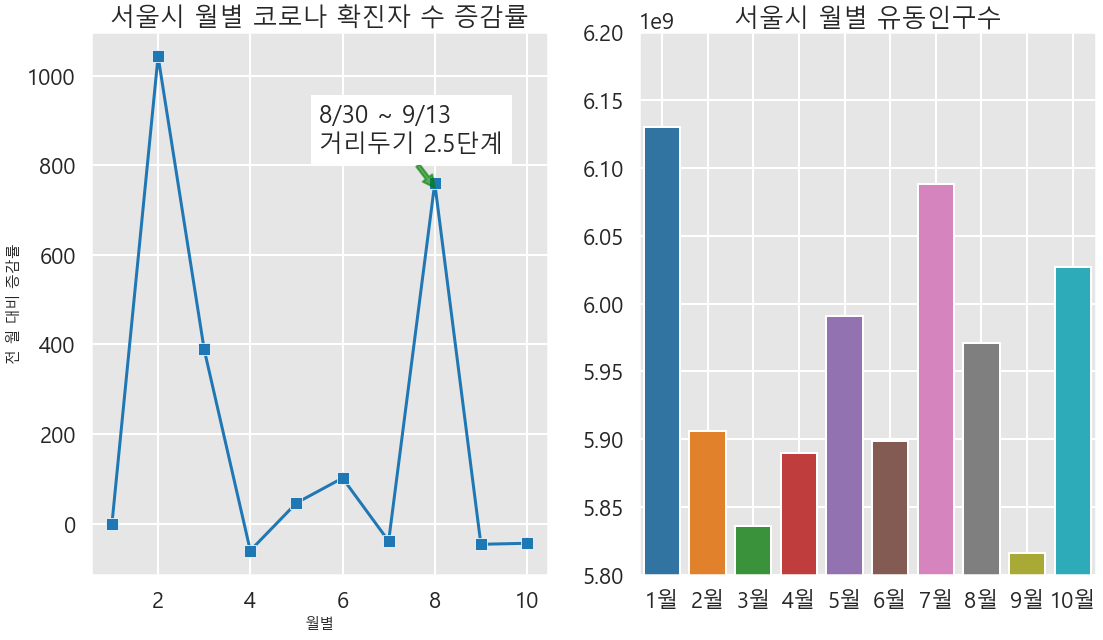

In [21]:
# 2020년 월별 유동인구 총합
fig = plt.figure()
fig, ax = plt.subplots(1, 2, figsize = (18,10))

cg = sns.lineplot(x="월" , y="전 월 대비 증감률" ,data=covid_df2, marker="s", linestyle="--",ax=ax[0])
cg.annotate("8/30 ~ 9/13 \n거리두기 2.5단계",(8,750),xytext=(0.5,0.78),textcoords="axes fraction",bbox=dict(boxstyle="square",color="white"), arrowprops=dict(color='g',alpha=0.6))
cg.set_facecolor((0.9,0.9,0.9))
cg.set_xlabel("월별",fontsize= 15)
cg.set_ylabel("전 월 대비 증감률",fontsize=15)
cg.set_title("서울시 월별 코로나 확진자 수 증감률",fontsize=25)
cg.grid(True)

pg = sns.barplot(x='월',y='유동인구',data=p_df, ax=ax[1])
pg.set_facecolor((0.9,0.9,0.9))
pg.set_xlabel("",fontsize= 15)
pg.set_ylabel("",fontsize=15)
pg.set_title("서울시 월별 유동인구수",fontsize=25)
pg.grid(True)
pg.set_ylim(5800000000,6200000000)

코로나 확진자 증감률과 월별 유동인구수를 시각화 했습니다. 

- (20년 1월~10월) 유동인구수가 많았던 월은 '1월', '7월', '10월' 입니다. 반대로 유동인구수가 적었던 월은 '3월', '9월' 입니다.
- 코로나가 유동인구수에 어떤 영향을 끼쳤는지 서울시 코로나 확진자 수 증감률을 구해 확인해보았습니다.
   - 위의 그래프로 서울시 코로나 확진자 수 증감률과 유동인구수를 비교해보니, 코로나 확진자 수가 증가할 때는 유동인구수가 줄어들고, 코로나 확진자 수가 감소 할때는 유동인구수가 증가했습니다. 이를 통해 코로나 확진자 수에 따른 사회적 거리두기 단계와 유동인구수가 연관성이 있다는 것을 알 수 있습니다.

# 연령대별 유동인구
## 연령대별 유동인구수 분석

In [22]:
df2 = df.sort_values(by='일자')  # 일자별로 정렬

twenty = df2[df2['연령대'] == 20]
twenty = twenty.groupby('군구').mean().reset_index()

thirty = df2[df2['연령대'] == 30]
thirty = thirty.groupby('군구').mean().reset_index()

forty = df2[df2['연령대'] == 40]
forty = forty.groupby('군구').mean().reset_index()

fifty = df2[df2['연령대'] == 50]
fifty = fifty.groupby('군구').mean().reset_index()

sixty = df2[df2['연령대'] == 60]
sixty = sixty.groupby('군구').mean().reset_index()

seventy = df2[df2['연령대'] == 70]
seventy = seventy.groupby('군구').mean().reset_index()

In [23]:
# 연령대별 유동인구수의 총합
df3 = df.pivot_table(index=['연령대'],values='유동인구수',aggfunc='sum')
df3 = df3.sort_values(by='유동인구수', ascending=False)
df3

,유동인구수
연령대,
30,12163638160
40,12136299770
50,11378866760
20,10936065410
60,7363434240
70,5575390650


어느 연령대의 유동인구수가 가장 많은지 알아보았습니다.

<Figure size 432x288 with 0 Axes>

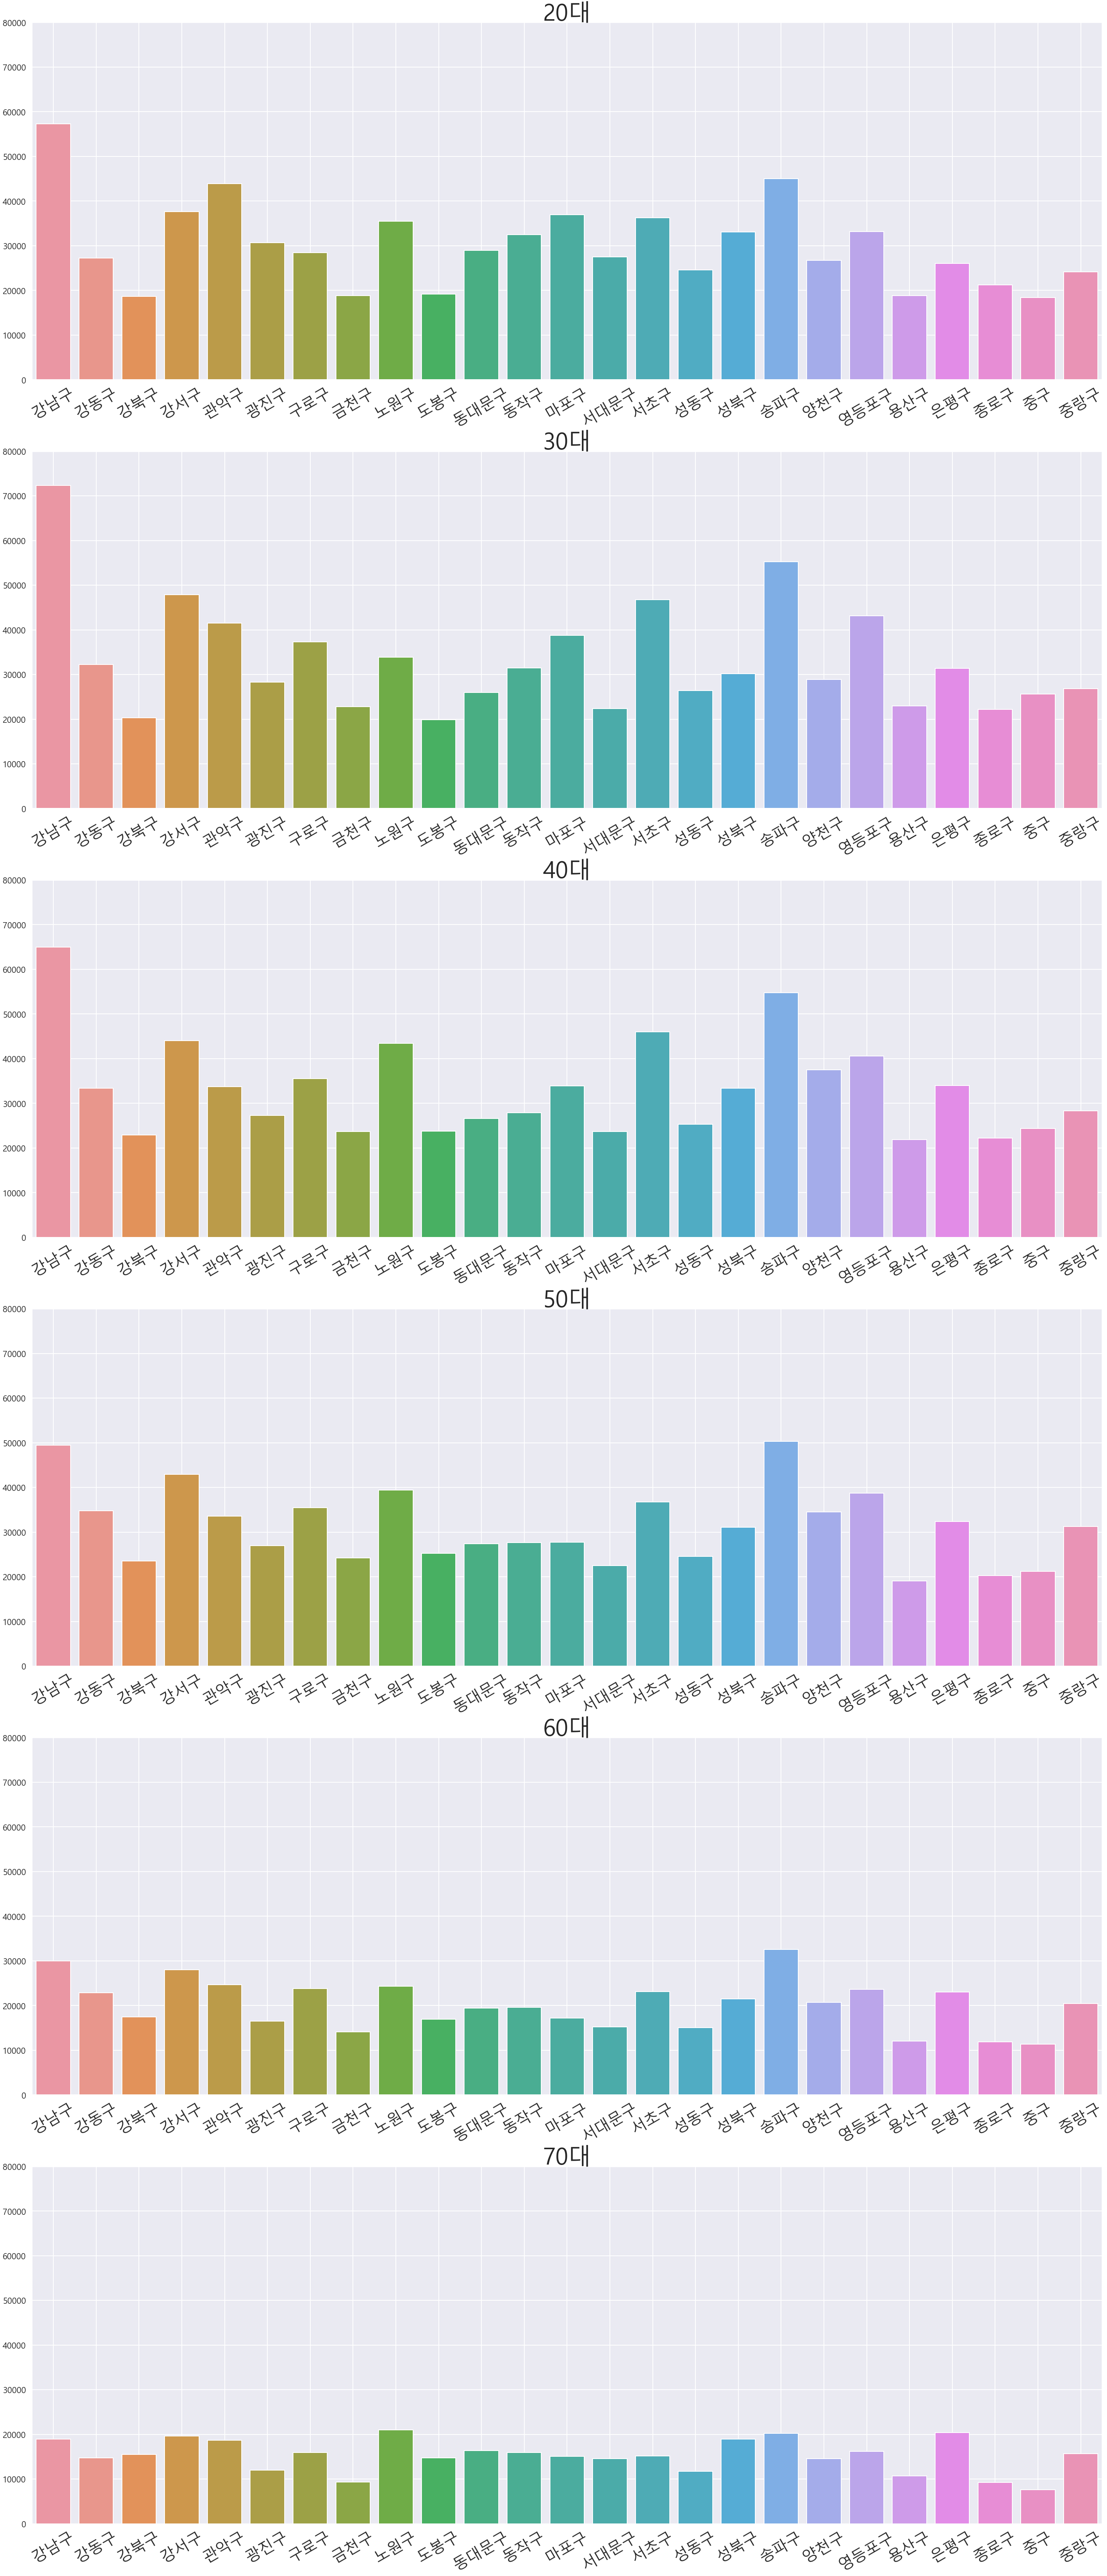

In [24]:
fig = plt.figure()
fig, axis = plt.subplots(6,1, figsize = (50,120))
plt.rc('ytick',labelsize=25)

tw = sns.barplot(data=twenty,y='유동인구수',x='군구',ax=axis[0])
th = sns.barplot(data=thirty,y='유동인구수',x='군구',ax=axis[1])
fo = sns.barplot(data=forty,y='유동인구수',x='군구',ax=axis[2])
fi = sns.barplot(data=fifty,y='유동인구수',x='군구',ax=axis[3])
si = sns.barplot(data=sixty,y='유동인구수',x='군구',ax=axis[4])
se = sns.barplot(data=seventy,y='유동인구수',x='군구',ax=axis[5])

tw.set_xticklabels(tw.get_xticklabels(),rotation=30,fontsize=40)
tw.set_title("20대",fontsize=60)
tw.set_xlabel("")
tw.set_ylabel("")
tw.set_ylim(0, 80000)
tw.grid(True)
th.set_ylim(0, 80000)

th.set_xticklabels(th.get_xticklabels(),rotation=30,fontsize=40)
th.set_title("30대",fontsize=60)
th.set_xlabel("")
th.set_ylabel("")
th.grid(True)
fo.set_ylim(0, 80000)

fo.set_xticklabels(fo.get_xticklabels(),rotation=30,fontsize=40)
fo.set_title("40대",fontsize=60)
fo.set_xlabel("")
fo.set_ylabel("")
fo.grid(True)
fi.set_ylim(0, 80000)

fi.set_xticklabels(fi.get_xticklabels(),rotation=30,fontsize=40)
fi.set_title("50대",fontsize=60)
fi.set_xlabel("")
fi.set_ylabel("")
fi.grid(True)
si.set_ylim(0, 80000)

si.set_xticklabels(si.get_xticklabels(),rotation=30,fontsize=40)
si.set_title("60대",fontsize=60)
si.set_xlabel("")
si.set_ylabel("")
si.grid(True)
se.set_ylim(0, 80000)

se.set_xticklabels(se.get_xticklabels(),rotation=30,fontsize=40)
se.set_title("70대",fontsize=60)
se.set_xlabel("")
se.set_ylabel("")
se.grid(True)

연령대별 각 지역의 유동인구수를 시각화했습니다.


       - 20대: 강남구 - 송파구 - 관악구 - 강서구 - 마포구
       - 30대: 강남구 - 송파구 - 강서구 - 서초구 - 영등포구
       - 40대: 강남구 - 송파구 - 서초구 - 강서구 - 노원구
       - 50대: 송파구 - 강남구 - 강서구 - 노원구 - 영등포구
       - 60대: 송파구 - 강남구 - 강서구 - 관악구 - 노원구
       - 70대: 노원구 - 은평구 - 송파구 - 강서구 - 성북구               
       (연령대별로 유동인구수가 많은 지역, 오른쪽으로 갈수록 유동인구수 적어짐)


- 예상과 달리, 20대보다 30-40대 유동인구수가 더 많았습니다.
- 70대 제외, 전 연령대에서 '송파구'와 '강남구'가 상위권을 차지했습니다.
- 50대부터 연령대가 높아질수록 유동인구수가 눈에띄게 감소하고있습니다.

## 연령대별 각 지역의 유동인구수 

지역에 따른 연령대별 유동인구수를 쉽게 비교하기 위해 하나의 그래프에 표현했습니다.

In [ ]:
plt.figure(figsize=(30,20))
palette=sns.color_palette('husl',6)
sns.lineplot(data=df2, x='군구',y='유동인구수',hue='연령대',palette=palette)
plt.yticks(size=30)
plt.xticks(rotation=30,size=20)
plt.legend(bbox_to_anchor=(1.2, 1.0),loc='upper right', fontsize=50)
plt.title('연령대별 유동인구수 추이',size=60)
plt.grid(True)

'서초구', '강남구', '송파구'를 보면 20,30,40대와 60,70대의 유동인구수가 눈에 띄게 차이가 나는 것을 볼 수 있습니다.

# 결론

## 분석결과 요약

- 우선 지역별로 유동인구수의 순위를 비교해보면 강남3구(강남, 서초, 송파)와 강서구 지역이 순위가 높은 것을 알수 있었습니다. 이를 통해 해당 지역에 업무, 상업시설이 많이 분포해 있음을 유추해 볼 수 있었습니다.


- 다음으로 시간에 따른 지역별 유동인구수를 살펴 보면, 그래프가 위로 볼록한 중구, 영등포구, 강남구, 종로구 등은 업무지역으로 출근시간인 오전 7시부터 퇴근시간 오후 6시까지 유동인구가 많은 것으로 보아, 회사나 업무 등으로 그 지역으로 출근하는 사람이 많아 특정 시간대에 유동인구가 몰리는 것으로 보이고, 반대로 그래프가 아래로 볼록한 강북구, 도봉구, 은평구, 관악구, 중랑구 등은 대표적인 주거지역으로 업무시간을 제외한 저녁시간대에 유동인구가 몰리는 지역입니다.


- 월별 유동인구수와 코로나 확진자 수를 살펴보면, 확진자수의 증가율이 높을때는 유동인구수가 줄어들고, 증가율이 낮거나 감소할때는 유동인구수가 증가하는 결과가 나타났습니다.


- 마지막으로 연령별 유동인구수를 살펴보면, 큰 차이는 없지만 20대에 가까울 수록 강남구,송파구를 선호하고 70대에 가까울 수록 노원구,은평구를 선호하는 경향이 있음을 알 수 있었습니다.

## 분석 시사점

### 유동인구수와 각 지역의 거주인구수는 연관성이 있을까?

데이터 분석을 통해서 찾은 유동인구수 TOP5

    -지역('송파구', '강서구', '강남구', '노원구', '서초구'),
    
    -시간대('송파구', '강서구', '강남구', '서초구', '영등포구'), 
    
    -나이대별('송파구', '강서구', '강남구', '서초구', '영등포구')  
    
서울시 거주인구수 TOP5 지역('송파구', '강서구', '강남구', '노원구', '관악구')

============================================================================================

데이터 분석을 통해서 찾은 유동인구수 LEAST5

    -지역('중구, '종로구', '용산구', '금천구', '강북구'),
    
    -시간대('도봉구', '강북구', '용산구', '서대문구', '금천구'), 
        
    -나이대별('서대문구, '종로구', '용산구', '도봉구', '강북구') 
          
서울시 거주인구수 LEAST5 지역('중구, '종로구', '용산구', '금천구', '성동구')


위의 TOP5와 LEAST5 결과가 비슷하게 나온것으로 보아 유동인구수와 거주인구수는 상관관계가 있다고 볼 수 있습니다. 

### 유동인구수와 코로나는 연관성이 있을까? 

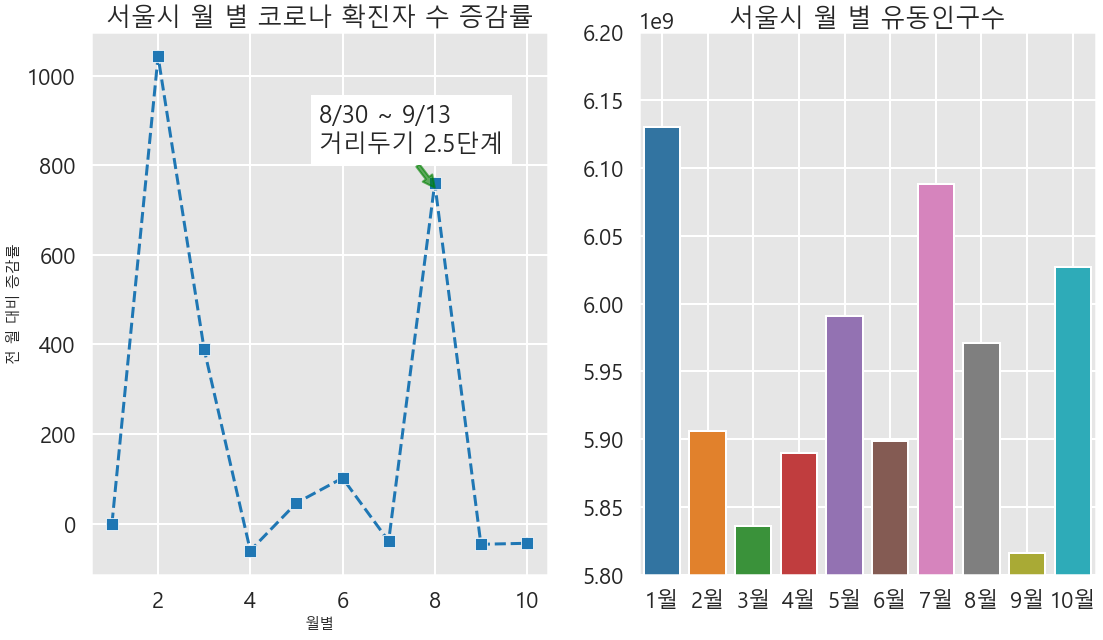

위의 그래프는 코로나 확진자 수가 증가함에 따라 유동인구수가 감소한다는 것을 잘 보여주고 있습니다. 

유동인구수가 크게 줄었던 2-3월과 8-9월에는 각각 코로나 1차 대유행이였던 신천지발 집단감염 사태와 코로나 2차 대유행이였던 사랑제일교회, 광복절 집회발 집단감염 사태가 있어 코로나 확진자 수가 크게 증가하였던 때였습니다. 이에 따라 사회적 거리두기 단계가 올라가고 재택근무, 비대면 수업 등으로 통근 및 통학 통행이 감소하고, 여가 활동을 위한 외출이 감소해서 유동인구수가 크게 감소하였습니다. 

## 분석의 한계점

서울시 유동인구를 지역, 시간, 월, 연령대별로 분석하면서 서울시 중심지역 및 특성을 알아봤는데, 분석을 하면서 다음과 같은 한계점을 알 수 있었습니다. 아쉬움이 남았습니다.

- 데이터 분석을 통해 나온 결과들을 분석하다보니 거주인구수가 많은 지역은 유동인구수도 높게 나오는 등 유동인구수와 거주인구수와 밀접한 관련이 있다는 것을 알게되었습니다. 따라서 보다 정확하게 분석하기 위해서는 거주인구 대비 유동인구비율을 고려했어야 했습니다.